In [2]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D

path = 'C:/Users/Katia/Documents/Applied Data Analytics - course/Kaggle_medical_cost'
os.chdir(path)

In [3]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('insurance.csv') 

In [4]:
# Check variables
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
# Check descriptive statistics of continuous variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


MATPLOTLIB

Continuous variables

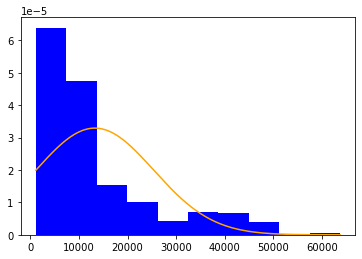

In [20]:
# Histogram with a fit line (if needed) for the outcome variable (i.e., charges)

mean = df['charges'].mean()
sd = df['charges'].std()

# Generate the normal PDF with spicy
distribution = norm(mean, sd)

# Get lower bound
min_weight = df['charges'].min()

# Get upper bound
max_weight = df['charges'].max()

# Generate a sequence of equally spaces values
values = list(range(int(min_weight), int(max_weight)))

# Generate probabilities for each value
probabilities = [distribution.pdf(v) for v in values]

# Plot histogram
plt.hist(df['charges'], bins=10, color = "blue", density = True) 

# Plot normal distribution (orange line)
plt.plot(values, probabilities, color = "orange")

# if not using jupiter notebook, the function plt.show() may be needed for plot to be displayed

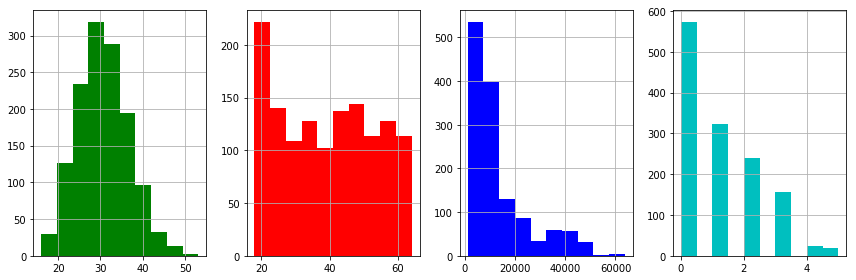

In [116]:
# Side by side histogram layout

# Use subplots to create plots side by side
fig, axes = plt.subplots(1, 4, figsize = (12,4))

# Create a histogram for "BMI"
axes[0].hist(df['bmi'], color ='g')
axes[0].grid(True) # Add grid if needed/wanted

# Create a histogram for "age"
axes[1].hist(df['age'], color ='r')
axes[1].grid(True)

# Create a histogram for "charges"
axes[2].hist(df['charges'], color = 'b')
axes[2].grid(True)

# Create a histogram for "children"
axes[3].hist(df['children'], color ='c')
axes[3].grid(True)

# Set side by side layout
fig.tight_layout()

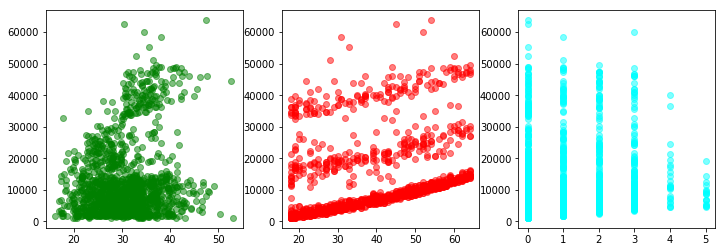

In [125]:
# Scatterplots with variables of interest and "charges" (i.e., a possible outcome or dependent variable)

# Use subplots to create plots side by side
fig, axes = plt.subplots(1, 3, figsize = (12,4))

# Create scatter for 'bmi' and 'charges'
axes[0].scatter(df['bmi'], df['charges'], alpha = .5, color = 'green') # alpha sets transparency

# Create scatter for 'bmi' and 'charges'
axes[1].scatter(df['age'], df['charges'], alpha = .5, color = 'red') # alpha sets transparency

# Create scatter for 'bmi' and 'charges'
axes[2].scatter(df['children'], df['charges'], alpha = .5, color = 'cyan') # alpha sets transparency

Text(0.5,1,'scatter plot bmi vs charges')

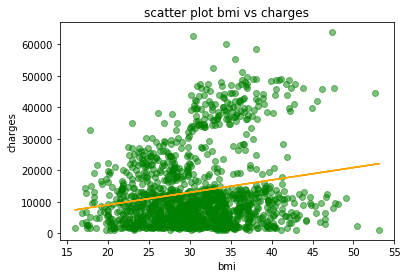

In [135]:
# Adding a line of best fit

# Fit the line with the data
m, b = np.polyfit(df['bmi'], df['charges'], 1)

# Plot scatter
plt.scatter(df['bmi'], df['charges'], color = "green", alpha = 0.5)

# Plot line
plt.plot(df['bmi'], m*df['bmi'] + b, color = "orange")

# Add x and y label if needed
plt.xlabel("bmi")
plt.ylabel('charges')

# Add plot title if needed
plt.title("scatter plot bmi vs charges")

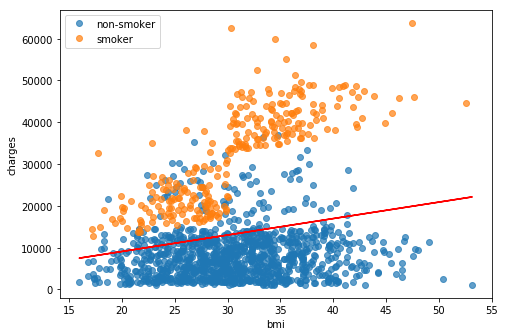

In [143]:
# Scatter plots discriminating groups

# read csv data 
df = pd.read_csv('insurance.csv') 

groups = ('male', 'female')

# Create a figure (this allows you to make plots bigger, for example)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
  
# Group the dataframe by the variable of interest (e.g., smoker)
groups = df.groupby("smoker")
for name, group in groups:
    plt.plot(group["bmi"], group["charges"], alpha = .7, marker="o", linestyle="", label = name)
plt.xlabel("bmi")
plt.ylabel("charges")
plt.legend({'non-smoker', 'smoker'})

m, b = np.polyfit(df['bmi'], df['charges'], 1)
plt.plot(df['bmi'], m*df['bmi'] + b, color = 'red')

Text(0.5,0,'children')

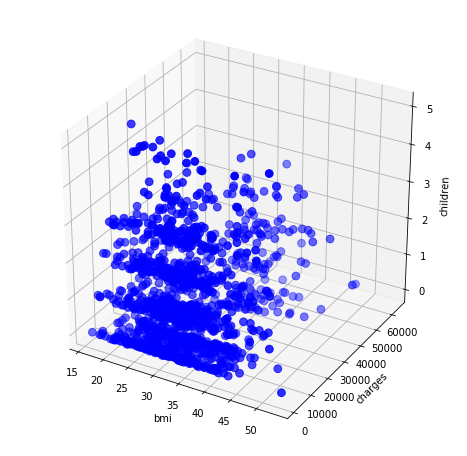

In [156]:
# Scatter plot in 3D (for a fancier presentation)

fig = plt.figure(figsize=(8,8))

# Apply 3D projection from matplotlib
ax = fig.add_subplot(111, projection = '3d')

# Plot scatter
ax.scatter(df['bmi'], df['charges'], df['children'], c='blue', s=60)

# Set labels
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
ax.set_zlabel('children')

# Jupyter notebood does not allow you to move the plot around, but Idle does

Categorical variables

<BarContainer object of 1338 artists>

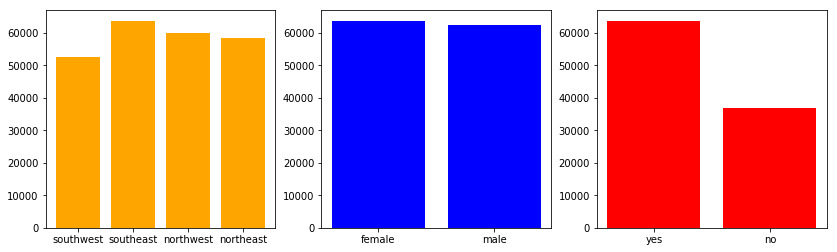

In [161]:
# Bar plots (useful to compare groups)

# Use subplots to create plots side by side
fig, axes = plt.subplots(1, 3, figsize = (14,4))

# Create plots, using charges (the outcome variable) as the metric
axes[0].bar(df['region'], df['charges'], color = 'orange')
axes[1].bar(df['sex'], df['charges'], color = 'blue')
axes[2].bar(df['smoker'], df['charges'], color = 'red')


In [167]:
# Stacked bar plot with error 

# calculate mean values for the variables you need using the groupby function
df2 = df.filter(['charges','region','sex'])
region_mean = df2.groupby(['sex','region'])['charges'].mean()
region_mean


sex     region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: charges, dtype: float64

In [166]:
# calculate SD values for the variables you need using the groupby function
df2 = df.filter(['charges','region','sex'])
region_sd = df2.groupby(['sex','region'])['charges'].std()
region_sd

sex     region   
female  northeast    10591.929980
        northwest    10596.572843
        southeast    12587.261506
        southwest    10453.660658
male    northeast    11890.942381
        northwest    11569.561020
        southeast    15083.360816
        southwest    12499.550025
Name: charges, dtype: float64

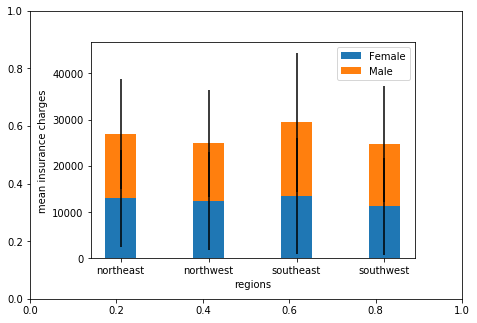

In [168]:
# Create lists with the means and SDs
female = [12953.203151, 12479.870397, 13499.669243, 11274.411264]
male = [13854.005374, 12354.119575, 15879.617173, 13412.883576]
female_sd = [10558.984550, 10564.216819, 12551.246378, 10421.346329]
male_sd = [11854.410981, 11533.574740, 15043.404823, 12461.148859]

index = ['northeast', 'northwest', 'southeast', 'southwest']

# Set the width of the bars
width = 0.35 

fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1,1])

#To save file with labels, the position of the plot needs to be 
ax = fig.add_axes([0.14,0.14,0.75,0.75]) # axis starts at 0.1, 0.1

# Generate the bars
ax.bar(index, female, width, yerr=female_sd, label='Female')
ax.bar(index, male, width, yerr=male_sd, bottom=female, label='Male')

plt.legend() # Automatically pulls the labes
plt.ylabel('mean insurance charges')
plt.xlabel('regions')

plt.savefig('stacked_bar_plot_patients.pdf')

Text(0.5,0,'regions')

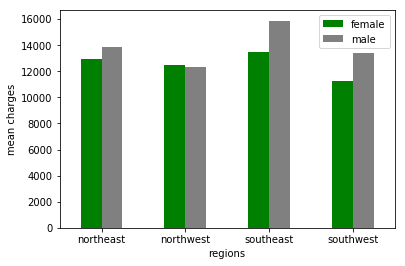

In [9]:
# Non-stacked box plot

female = [12953.203151, 12479.870397, 13499.669243, 11274.411264]
male = [13854.005374, 12354.119575, 15879.617173, 13412.883576]
index = ['northeast', 'northwest', 'southeast', 'southwest']
df = pd.DataFrame({'female': female,
                   'male': male}, index=index)
ax = df.plot.bar(color = ['green', 'gray'], rot=0)
plt.ylabel('mean charges')
plt.xlabel('regions')

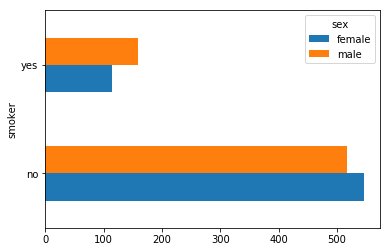

In [180]:
# Bar plots by groups (useful to check the distribution of categorical variables)

df2 = df.filter(['charges','region','sex','smoker'])
region_mean = df2.groupby('sex').smoker.value_counts().unstack(0).plot.barh()


([<matplotlib.axis.XTick at 0x1c6f17c94e0>,
 <a list of 4 Text xticklabel objects>)

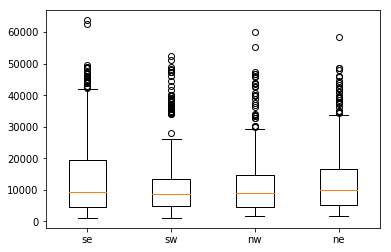

In [96]:
# Box plot by groups

sw = df[df['region'] == 'southwest']
se = df[df['region'] == 'southeast']
ne = df[df['region'] == 'northeast']
nw = df[df['region'] == 'northwest']
groups =[se['charges'], sw['charges'], nw['charges'], ne['charges']]
plt.boxplot(groups)
plt.xticks([1,2,3,4], ["se", "sw", "nw", "ne"])

([<matplotlib.axis.XTick at 0x1c682ad7358>,
 <a list of 2 Text xticklabel objects>)

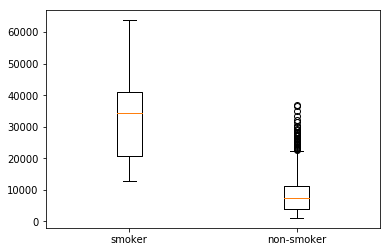

In [181]:
# Box plot by groups

smoker = df[df['smoker'] == 'yes']
non_smoker = df[df['smoker'] == 'no']
groups =[smoker['charges'], non_smoker['charges']]
plt.boxplot(groups)
plt.xticks([1,2], ["smoker", "non-smoker"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C682DDF2E8>,
      dtype=object)

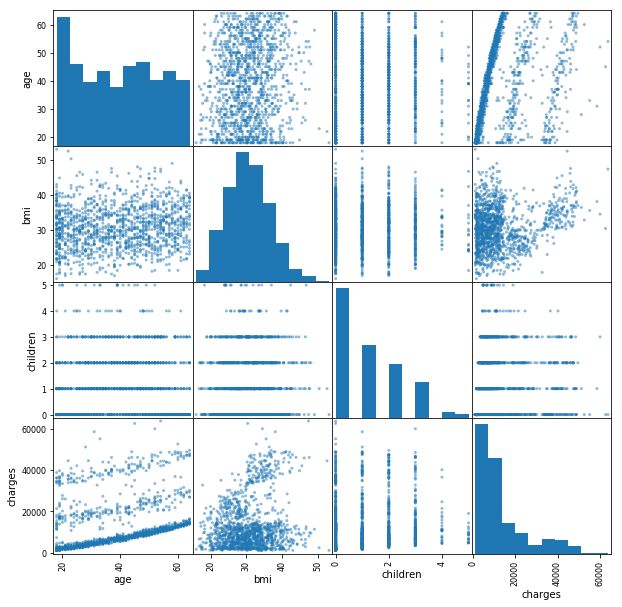

In [187]:
# Pairplot with scatter plots and histograms for entire dataframe (only continuous variables)

from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha = 0.5, figsize=(10, 10), diagonal = "hist")

SEABORN
Seaborn comes with presets that can facilitate plotting without the need to include every single label and detail as matplotlib requires.

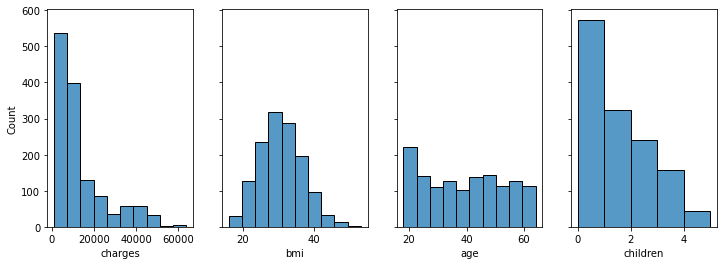

In [35]:
# Histogram

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize = (12,4))

sns.histplot(df['charges'], bins =10, ax = ax1)
sns.histplot(df['bmi'], bins =10, ax = ax2)
sns.histplot(df['age'], bins =10, ax = ax3)
sns.histplot(df['children'], bins =5, ax = ax4)

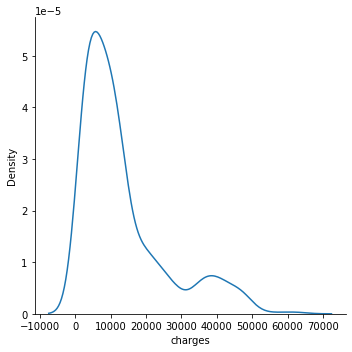

In [45]:
# Fit line (kernel density estimate)

sns.displot(df['charges'], kind = 'kde')

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


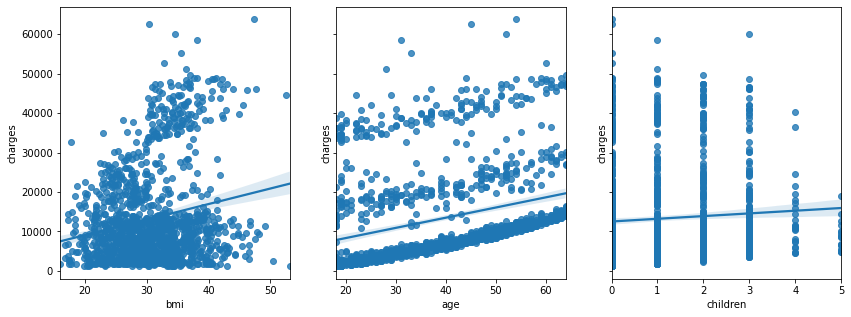

In [54]:
# Scatter plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (14,5))

sns.regplot(df['bmi'], df['charges'], ax = ax1)
sns.regplot(df['age'], df['charges'], ax = ax2)
sns.regplot(df['children'], df['charges'], ax = ax3)

# use sns.scatterplot() if the line of best fit is not needed

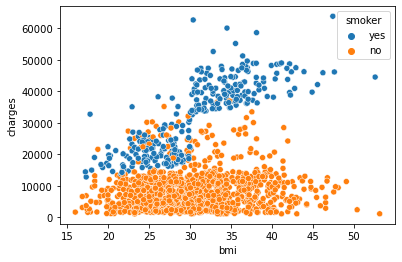

In [67]:
# Scatterplot discriminating groups

sns.scatterplot(df['bmi'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


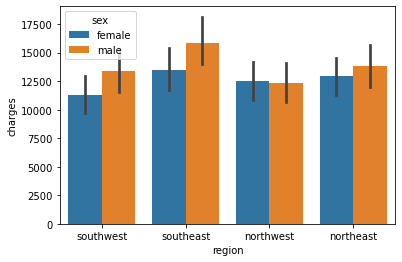

In [78]:
sns.barplot(df['region'], df['charges'], hue = df['sex'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


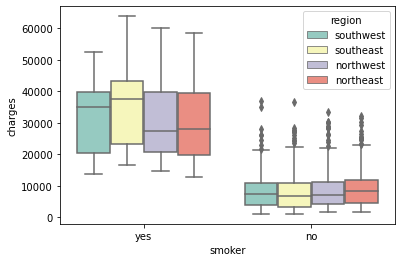

In [93]:
# Boxplot
sns.boxplot(df['smoker'], df['charges'], hue=df['region'], palette="Set3") #palette set3 reduce transparency

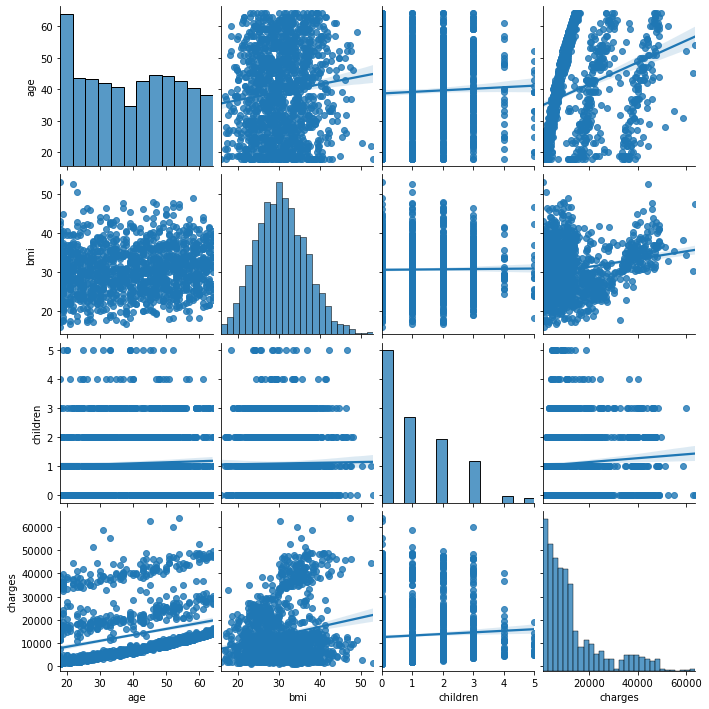

In [75]:
# Pairplot

sns.pairplot(df, kind="reg")
# plt.show() needed in other environments to display the 